# Ridge Regression Visualization

This notebook visualizes why it's called "Ridge" Regression by showing:
1. The loss surface for OLS with dependent features
2. The "ridge" that forms at the bottom of the loss surface
3. How regularization lifts this ridge to create a unique minimum

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Create dataset with dependent features
X = np.array([[1, 2],
              [2, 4],
              [3, 6]])  # X2 = 2X1
Y = np.array([3, 5, 8])

# Define loss functions
def ols_loss(beta1, beta2):
    """Ordinary Least Squares loss function"""
    return np.mean([(Y[i] - (beta1*X[i,0] + beta2*X[i,1]))**2 
                    for i in range(len(Y))])

def ridge_loss(beta1, beta2, lambda_reg=1.0):
    """Ridge Regression loss function"""
    return ols_loss(beta1, beta2) + lambda_reg * (beta1**2 + beta2**2)

# Create grid of beta values
beta1_range = np.linspace(-2, 2, 100)
beta2_range = np.linspace(-2, 2, 100)
B1, B2 = np.meshgrid(beta1_range, beta2_range)

# Calculate loss surfaces
Z_ols = np.zeros_like(B1)
Z_ridge = np.zeros_like(B1)
for i in range(len(beta1_range)):
    for j in range(len(beta2_range)):
        Z_ols[i,j] = ols_loss(B1[i,j], B2[i,j])
        Z_ridge[i,j] = ridge_loss(B1[i,j], B2[i,j])

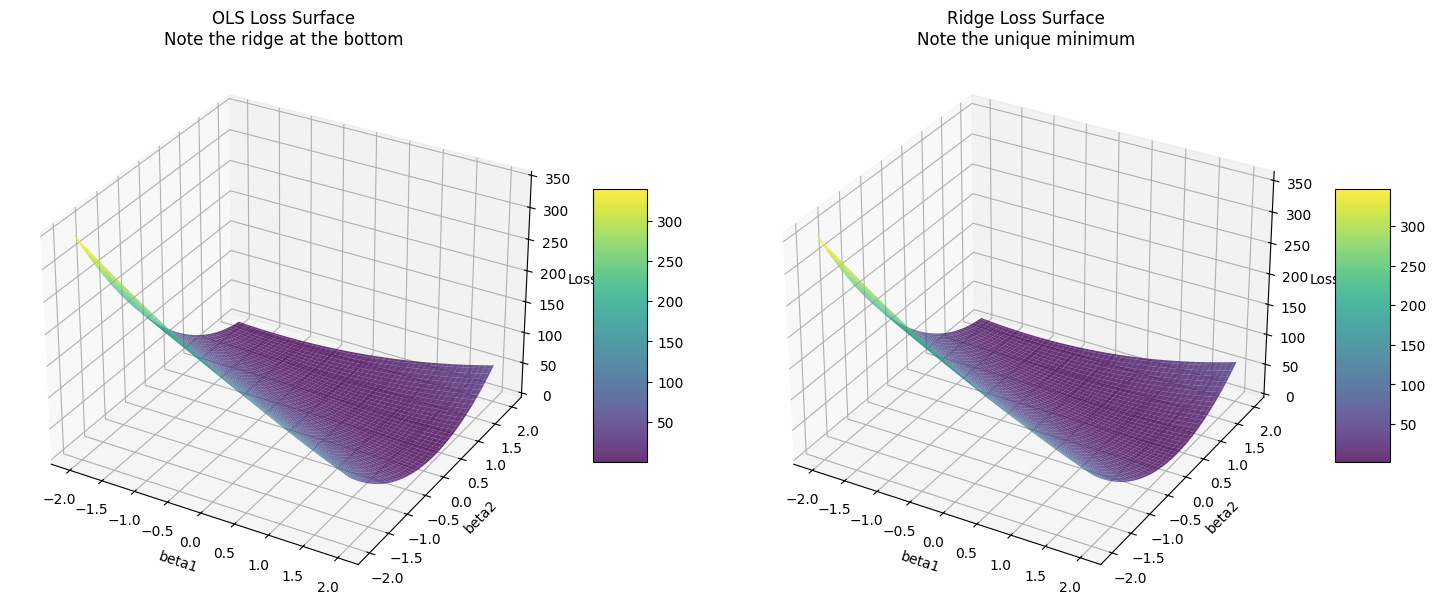

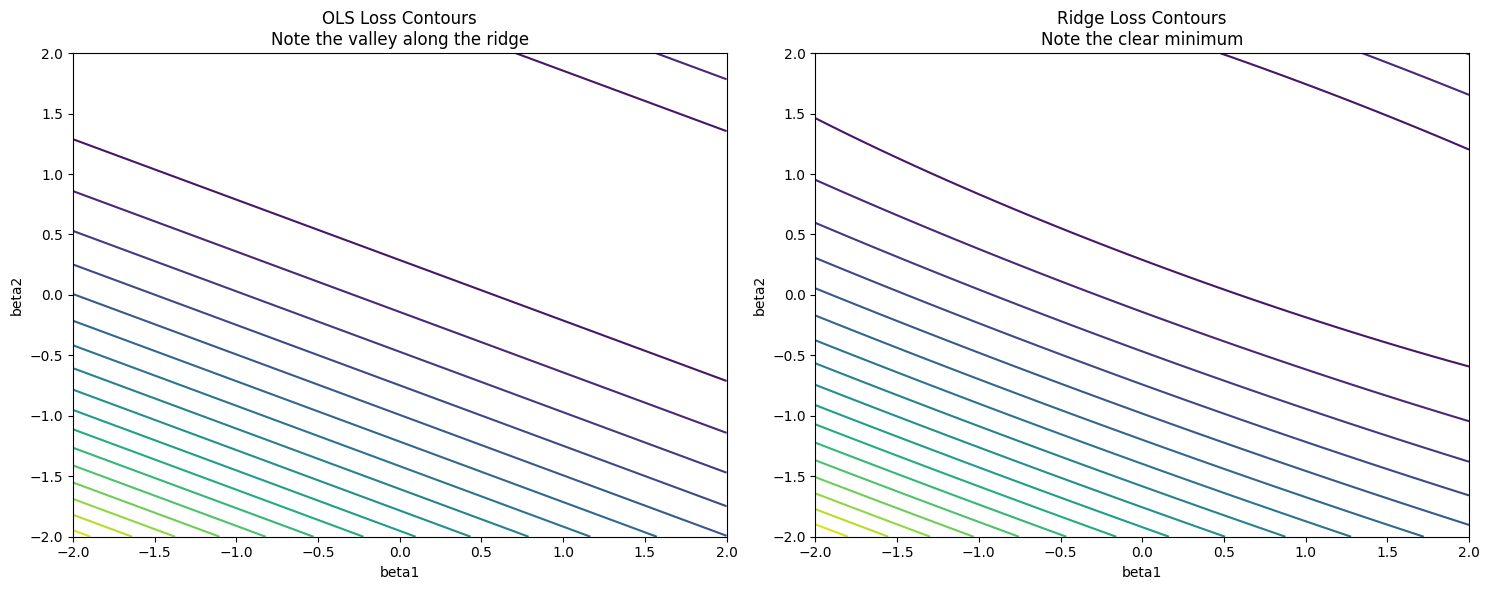

In [3]:
# Plot both loss surfaces
fig = plt.figure(figsize=(15, 6))

# OLS Loss Surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(B1, B2, Z_ols, cmap='viridis', alpha=0.8)
ax1.set_xlabel('beta1')
ax1.set_ylabel('beta2')
ax1.set_zlabel('Loss')
ax1.set_title('OLS Loss Surface\nNote the ridge at the bottom')

# Ridge Loss Surface
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(B1, B2, Z_ridge, cmap='viridis', alpha=0.8)
ax2.set_xlabel('beta1')
ax2.set_ylabel('beta2')
ax2.set_zlabel('Loss')
ax2.set_title('Ridge Loss Surface\nNote the unique minimum')

# Add colorbars
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# Plot contours to better see the ridge
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# OLS contours
c1 = ax1.contour(B1, B2, Z_ols, levels=20)
ax1.set_xlabel('beta1')
ax1.set_ylabel('beta2')
ax1.set_title('OLS Loss Contours\nNote the valley along the ridge')

# Ridge contours
c2 = ax2.contour(B1, B2, Z_ridge, levels=20)
ax2.set_xlabel('beta1')
ax2.set_ylabel('beta2')
ax2.set_title('Ridge Loss Contours\nNote the clear minimum')

plt.tight_layout()
plt.show()

# Understanding the Visualization

The plots above demonstrate why this technique is called "Ridge" Regression:

1. **OLS Loss Surface**:
   - When features are dependent (X2 = 2X1), the loss surface has a ridge at the bottom
   - This ridge means there are infinite solutions with the same (minimum) loss
   - Any point along this valley gives the same prediction quality
   - This is problematic because some of these solutions have very large coefficients

2. **Ridge Loss Surface**:
   - Adding the regularization term (λ(β₁² + β₂²)) "lifts" the ridge
   - Creates a unique minimum point instead of an infinite valley
   - Forces the solution to have smaller coefficients
   - Makes the solution more stable and interpretable

The ridge in the OLS loss surface is what gives Ridge Regression its name, as the regularization term specifically addresses this ridge by creating a unique minimum.